In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

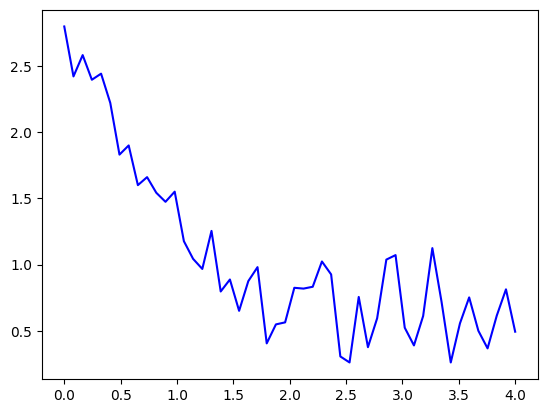

In [3]:
xdata = np.linspace(0, 4, 50)
y = func(xdata, 2.5, 1.3, 0.5)
rng = np.random.default_rng()
y_noise = 0.2 * rng.normal(size=xdata.size)
ydata = y + y_noise
plt.plot(xdata, ydata, 'b-', label='data')

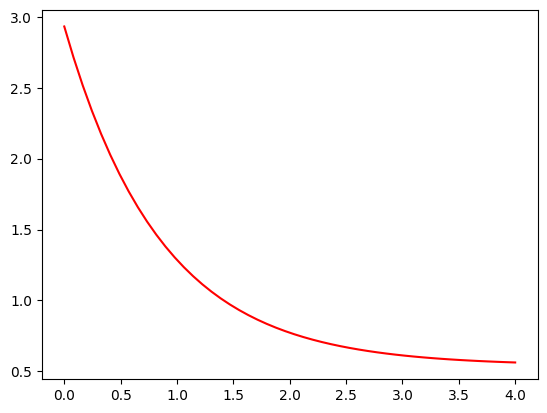

In [4]:
popt, pcov = curve_fit(func, xdata, ydata)
popt
plt.plot(xdata, func(xdata, *popt), 'r-',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))

In [5]:
import json

In [8]:
y = json.load(open("/Users/yinxiaogang/Documents/2025/cs336_2025/assignment3-scaling/data/isoflops_curves.json"))

In [10]:
min_loss = {}
min_loss_pair = {}
for test in y:
    if test["compute_budget"] not in min_loss or test["final_loss"] < min_loss[test["compute_budget"]]:
        min_loss[test["compute_budget"]] = test["final_loss"]
        min_loss_pair[test["compute_budget"]] = test["parameters"]

In [35]:
C = []
N = []
for c, n in sorted(min_loss_pair.items()):
    print(c, n, c/(6*n)/n)
    C.append(c)
    N.append(n)

6e+18 762093419 1.7218034645274298
1e+19 806647749 2.561420595303711
3e+19 1536852354 2.1169261660709755
6e+19 1952041776 2.624350178083856
1e+20 3253402960 1.5746101068503133
3e+20 5903836027 1.4345028999495435
6e+20 6971055968 2.0577985692201377
1e+21 6859328563 3.542301616712086
3e+21 12148905329 3.3876279602099935


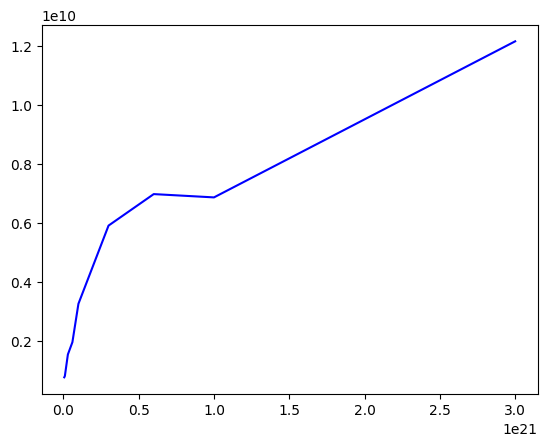

In [21]:
plt.plot(C, N, 'b-', label='data')

In [27]:
def func_N_C(x, a, b, c):
    return a * (x ** b) + c
popt, pcov = curve_fit(func_N_C, C, N, maxfev=5000)
popt
#plt.plot(xdata, func_N_C(xdata, *popt), 'r-',
#         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))

array([ 1.35024658e+03,  3.25313449e-01, -1.19220472e+09])

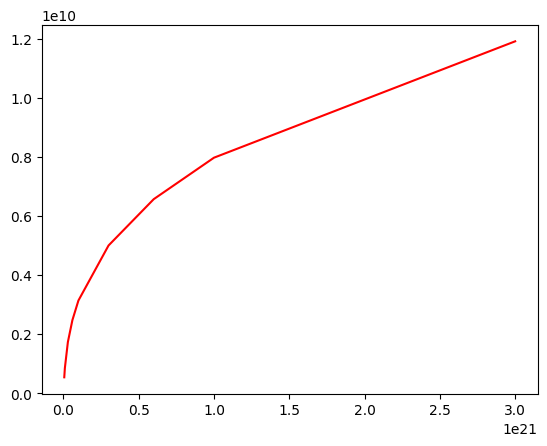

In [29]:
plt.plot(C, func_N_C(C, *popt), 'r-',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))

In [30]:
func_N_C(1e23, *popt)

np.float64(39792556129.79085)

In [31]:
func_N_C(1e24, *popt)

np.float64(85491178611.99681)

In [37]:
1e24/(85491178611.99681 ** 2)/6


22.80374315051881

In [38]:
1e23/(39792556129.79085 ** 2)/6

10.525556686264165

/var/folders/cj/0z64hm897lj40xc77xmmjcs00000gn/T/ipykernel_3848/1305866532.py:18: UserWarning: Glyph 36724 (\N{CJK UNIFIED IDEOGRAPH-8F74}) missing from font(s) DejaVu Sans.
  plt.savefig('sin_plot.svg', dpi=300, bbox_inches='tight', facecolor='white')
/var/folders/cj/0z64hm897lj40xc77xmmjcs00000gn/T/ipykernel_3848/1305866532.py:18: UserWarning: Glyph 27491 (\N{CJK UNIFIED IDEOGRAPH-6B63}) missing from font(s) DejaVu Sans.
  plt.savefig('sin_plot.svg', dpi=300, bbox_inches='tight', facecolor='white')
/var/folders/cj/0z64hm897lj40xc77xmmjcs00000gn/T/ipykernel_3848/1305866532.py:18: UserWarning: Glyph 24358 (\N{CJK UNIFIED IDEOGRAPH-5F26}) missing from font(s) DejaVu Sans.
  plt.savefig('sin_plot.svg', dpi=300, bbox_inches='tight', facecolor='white')
/var/folders/cj/0z64hm897lj40xc77xmmjcs00000gn/T/ipykernel_3848/1305866532.py:18: UserWarning: Glyph 26354 (\N{CJK UNIFIED IDEOGRAPH-66F2}) missing from font(s) DejaVu Sans.
  plt.savefig('sin_plot.svg', dpi=300, bbox_inches='tight', facecol

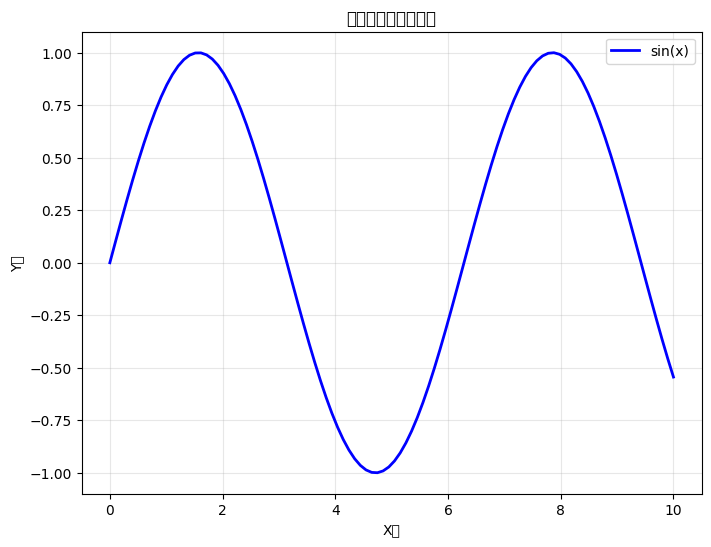

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# 1. 绘制示例图表
x = np.linspace(0, 10, 100)
y = np.sin(x)

plt.figure(figsize=(8, 6))
plt.plot(x, y, label='sin(x)', color='blue', linewidth=2)
plt.xlabel('X轴')
plt.ylabel('Y轴')
plt.title('正弦曲线（矢量图）')
plt.legend()
plt.grid(True, alpha=0.3)

# 2. 保存为SVG矢量图（核心：后缀改为.svg）
# SVG是纯矢量格式，支持编辑（如用Inkscape、Illustrator修改）
plt.savefig('sin_plot.svg', dpi=300, bbox_inches='tight', facecolor='white')

# 也可以保存为PDF矢量图（同样无损）
# plt.savefig('sin_plot.pdf', dpi=300, bbox_inches='tight', facecolor='white')

# 3. 显示图表
plt.show()